# HARRIS
- Refer [paper](https://gurus.pyimagesearch.com/wp-content/uploads/2015/06/harris_1988.pdf) 
- One of the most common kyepoint detectors, used to detect corners.
- Relatively fast and accurate
<img src="../../images/embedded_images/harris_gradients1.jpg" alt="Drawing" style="width: 500px;"/>
- On the left, we have the original image that we want to detect keypoints on. The middle image represents the gradient magnitude in the x direction. Finally, the right image represents the gradient magnitude in the y direction. We utilize these gradient magnitudes to find and detect corners in images.
- In the below image, we take $2\times2$ pixel region. The top-left and bottom-right pixels are black and top-right and bottom-left pixels are white. At the center of these pixels, we thus have a corner
<table><tr>
<td><img src="../../images/embedded_images/harris_2x2.jpg" alt="Drawing" style="width: 200px;"/>
<td><img src="../../images/embedded_images/harris_2x2_corner1.jpg" alt="Drawing" style="width: 200px;"/>
</tr></table>
- We define the regions as a corner by taking $\sum(G_x)^2$ and $\sum(G_y)^2$. If these values are large, then the region is a corner. 
- This process is done for every pixel in the input image. This works because the region enclosed in the red circle will have a high number of both horizontal and vertical gradients.
- To extend this method to arbitrary corners, we first need to 1) compute the gradient magnitude representation of image, and 2)then use the gradient magniture to construct matrix M
$$
M = \begin{bmatrix}\sum G_{x}^{2} & \sum G_{x}G_{y} \\  \sum G_{x}G_{y} & \sum G_{y}^{2} \end{bmatrix}
$$
- We can take the [eigenvalue decomposition](https://en.wikipedia.org/wiki/Eigendecomposition_of_a_matrix) of the matrix, leaving us a “score” indicating the “cornerness” (i.e. a value to quantify and score how much of a “corner” the region is:
$$
R = det(M) - k(trace(M))^{2}
$$
where $ det(M) = \lambda_{1}\lambda_{2}$ and $trace(M) = \lambda_{1} + \lambda_{2}$ and both $\lambda_1$ $\lambda_2$ are eigenvalues of matrix M.
- We can determine if a region is a keypoint or not using:
    - If $|R|$ is small, we are examining a flat region. Not a keypoint
    - If $R<0$, which happens when $\lambda_1 >> \lambda_2$ or $\lambda_2 >> \lambda_1$, then the region is an edge. Not a keypoint
    - If $|R|$ is large, which corresponds to $\lambda_1 \approx \lambda_2$. Region is a keypoint

In [1]:
import sys
sys.path.append("../../")

In [2]:
import numpy as np
import cv2
import imutils
from cv_imshow import create_subplot, display_image

In [3]:
args = {
    "image":"../../images/fast_book_cover.png",
    "pen":"../../images/keypoint_detect/pen.jpg"
}

In [4]:
def harris(gray, blockSize, apetureSize, k, T):
    #convert our input image to floating point data type
    #then compute the harris corner matrix
    gray = np.float32(gray)
    display_image("image", gray)
    H = cv2.cornerHarris(gray, blockSize, apetureSize, k)
    
    #for every (x,y)-coordinate where Harris value is above threshold
    #create a keypoint
    kps = np.argwhere(H > T * H.max())
    kps = [cv2.KeyPoint(float(pt[1]), float(pt[0]), 3) for pt in kps]
    
    return kps

In [5]:
def keypoint_detector(imagePath, blockSize=2, apetureSize=3, k=0.1, T=0.02):
    #load and convert it to grayscale
    image = cv2.imread(imagePath)
    orig = image.copy()
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    #detect harris keypoints
    kps = harris(gray, blockSize, apetureSize, k, T)
    
    #loop over keypoints and draw
    for kp in kps:
        r = int(0.5*kp.size)
        (x,y) = np.int0(kp.pt)
        cv2.circle(image, (x,y), r, (0,255,255), 2)
    
    display_image("Image", np.hstack([orig,image]))

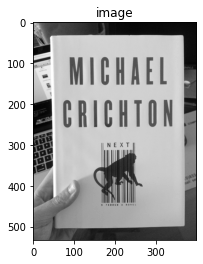

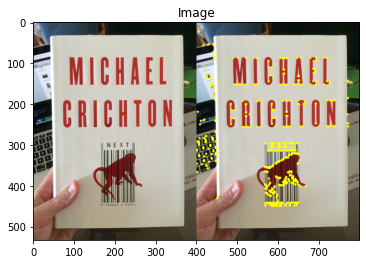

In [6]:
keypoint_detector(args["image"])

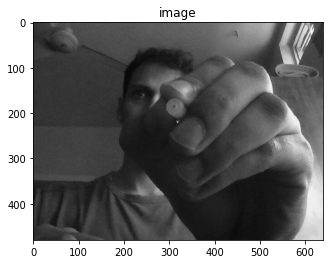

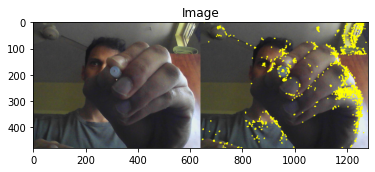

In [12]:
keypoint_detector(args["pen"], T=0.00002)